# Data Analysis

# Notebook set-up

In [2]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import io
import statistics as stat
import statsmodels.api as sm
from statsmodels.api import OLS
import random
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix, radviz

sns.set_style('whitegrid')
sns.set_context('notebook')

/Users/dave/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data loading

In [3]:
# Load the data into a dataframe 
#can_master = pd.read_csv('can-1996-2016.csv')
#cmte_master =pd.read_csv('cm-1996-2014.csv') 
#opex=pd.read_csv('opex-2004-2014.csv')
#oth=pd.read_csv('oth-1996-2014.csv')
#exp=pd.read_csv('expresults_rev.csv')
#election_spend=pd.read_csv('catall.csv')
#results = pd.read_csv('candr.csv')
#catsort= pd.read_csv('catsort_rev.csv')
cost_vote = pd.read_csv('combined_all.csv')

In [4]:
cost_vote.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,ge_winner_indicator,total_votes,totalspend,costpervote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,DEM,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,REP,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
2,H0AL00016,2010,19831.34,909.80,81.19,465.00,0.0,3177.55,2192.99,0.0,...,0,DEM,6672.0,0.0,0.0,0.0,0,6672.0,26957.87,4.040448
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,REP,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876


In [5]:
cost_vote.dtypes

cand_id                      object
cycle                         int64
c1                          float64
c2                          float64
c3                          float64
c4                          float64
c5                          float64
c6                          float64
c7                          float64
c8                          float64
c9                          float64
c10                         float64
c11                         float64
c12                         float64
c13                         float64
state_abbreviation           object
district                     object
incumbent                    object
party                        object
primary_votes               float64
runoff_votes                float64
general_votes               float64
ge_runoff_election_votes    float64
ge_winner_indicator          object
total_votes                 float64
totalspend                  float64
costpervote                 float64
dtype: object

In [6]:
cost_vote['total_votes']=cost_vote['total_votes'].fillna(0)

In [7]:
cost_vote['totalspend']=cost_vote['totalspend'].fillna(0)

In [8]:
cost_vote['incumbent']=cost_vote['incumbent'].fillna(0)

In [9]:
cost_vote['party']=cost_vote['party'].fillna('None')

In [10]:
cost_vote = cost_vote.drop(['costpervote'], axis=1)

In [11]:
cost_vote['totalspend']=pd.to_numeric(cost_vote['totalspend'],errors='coerce')

In [12]:
print(cost_vote[pd.to_numeric(cost_vote['totalspend'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [13]:
cost_vote['total_votes']=pd.to_numeric(cost_vote['total_votes'],errors='coerce')

In [14]:
print(cost_vote[pd.to_numeric(cost_vote['total_votes'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [15]:
cost_vote['cycle']=pd.to_numeric(cost_vote['cycle'],errors='coerce')

In [16]:
print(cost_vote[pd.to_numeric(cost_vote['cycle'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [17]:
cost_vote = cost_vote[cost_vote.total_votes != 0]

In [18]:
cost_vote.loc[cost_vote['totalspend'] == 0]

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,district,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,ge_winner_indicator,total_votes,totalspend
9107,H4TN09055,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,0,DEM,122.0,0.0,0.0,0.0,0,122.0,0.0
9853,H6VA10191,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,IND,0.0,0.0,1851.0,0.0,0,1851.0,0.0
10982,S4MD00160,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,S,0,REP,4110.0,0.0,0.0,0.0,0,4110.0,0.0
11505,H6LA02207,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,LBT,0.0,0.0,549.0,0.0,0,549.0,0.0
11506,H8NJ02133,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,RTB,0.0,0.0,1312.0,0.0,0,1312.0,0.0
11507,H0NJ02098,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,SUS,0.0,0.0,648.0,0.0,0,648.0,0.0
11508,H6RI01104,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,I,0.0,0.0,15108.0,0.0,0,15108.0,0.0
11509,H4AL02063,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,D,0.0,0.0,70562.0,0.0,0,70562.0,0.0
11510,H2AL05078,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,D,4393.0,0.0,0.0,0.0,0,4393.0,0.0
11511,H4AL05066,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,R,6742.0,2371.0,74145.0,0.0,0,83258.0,0.0


In [19]:
cost_vote = cost_vote.rename(columns = {'ge_winner_indicator':'winner'})

In [20]:
cost_vote['costvote'] = cost_vote['totalspend']/cost_vote['total_votes']

In [21]:
cost_vote.mean()

cycle                         2009.142466
c1                           82813.309249
c2                            2937.686044
c3                           24862.413532
c4                           77011.650229
c5                            4297.670139
c6                            7494.260491
c7                            2807.764581
c8                             115.423473
c9                              45.622999
c10                             83.920067
c11                            748.612873
c12                            287.573776
c13                         402798.463396
primary_votes                20683.139878
runoff_votes                   441.977017
general_votes                76868.068037
ge_runoff_election_votes       232.190030
total_votes                  98225.374962
totalspend                  606188.947376
costvote                      2662.593130
dtype: float64

In [22]:
cost_vote['cycle'] = cost_vote['cycle'].astype(int).astype('str')

In [23]:
cost_vote.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,total_votes,totalspend,costvote
count,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,1.314000e+04,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04
mean,8.281331e+04,2937.686044,2.486241e+04,7.701165e+04,4297.670139,7.494260e+03,2.807765e+03,115.423473,45.622999,83.920067,748.612873,287.573776,4.027985e+05,2.068314e+04,441.977017,7.686807e+04,2.321900e+02,9.822537e+04,6.061889e+05,2.662593e+03
std,4.662288e+05,13721.331612,1.365725e+05,5.160868e+05,19948.936705,4.880747e+04,2.082310e+04,5068.014913,875.780998,2216.931541,8543.058359,3322.745012,1.545528e+06,6.919007e+04,8472.866811,2.632518e+05,1.354564e+04,3.218754e+05,1.821591e+06,1.123215e+05
min,-7.637000e+02,-390.000000,-1.900000e-01,-7.500000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-5000.000000,0.000000,0.000000,-4.920380e+04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.663000e+03,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.125160e+03,5.676000e+03,0.000000,6.505000e+03,0.000000e+00,1.617900e+04,3.202793e+04,1.441572e+00
75%,1.417877e+04,68.235000,2.014810e+03,4.148600e+03,0.000000,3.873775e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.517188e+05,2.091725e+04,0.000000,1.013965e+05,0.000000e+00,1.238395e+05,5.978935e+05,7.717508e+00
max,2.545184e+07,527439.630000,8.283133e+06,2.546524e+07,777330.090000,2.290329e+06,1.000230e+06,500000.000000,43129.070000,164844.000000,407000.000000,117400.000000,3.943196e+07,2.566298e+06,631812.000000,7.864624e+06,1.228033e+06,1.025745e+07,4.955574e+07,7.044762e+06


In [24]:
cost_vote['party'] = cost_vote['party'].astype('str')

In [25]:
cost_vote = cost_vote.replace("DEM","D")

In [26]:
cost_vote = cost_vote.replace("REP","R")

In [27]:
cost_vote = cost_vote.replace("LBT","L")

In [28]:
cost_vote = cost_vote.replace("LIB","L")

In [29]:
major = !=["R","D","L"]

In [30]:
cost_vote = cost_vote.replace(major,"O")

In [31]:
cost_vote.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,R,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
2,H0AL00016,2010,19831.34,909.80,81.19,465.00,0.0,3177.55,2192.99,0.0,...,0,D,6672.0,0.0,0.0,0.0,0,6672.0,26957.87,4.040448
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,R,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876


In [32]:
cost_vote['party'].count()

13140

In [33]:
cost_vote['winner'].value_counts()

0             10355
1              2781
W (Runoff)        2
WW                1
Dd                1
Name: winner, dtype: int64

## Scores for Democrats (blue font unintentional) 

In [34]:
Gen = cost_vote[cost_vote.general_votes != 0]

In [35]:
Winner = Gen[Gen['winner'].isin(['1'])]

In [36]:
Loser = Gen[Gen['winner'].isin(['0'])]

In [37]:
Dem = Gen[Gen['party'].isin(['D'])]

In [38]:
DemW = Dem[Dem['winner'].isin(['1'])] #table of Democrats who won
DemW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1267.0,1.199751e+05,3.508850e+05,0.00,0.000000,0.000000,1.168401e+05,7.071784e+06
c2,1267.0,6.036074e+03,1.999258e+04,0.00,0.000000,0.000000,2.665975e+03,2.893896e+05
c3,1267.0,4.683261e+04,1.871672e+05,0.00,0.000000,0.000000,4.140319e+04,5.594799e+06
c4,1267.0,1.444014e+05,9.467859e+05,-750.00,0.000000,0.000000,5.594320e+03,2.546524e+07
c5,1267.0,9.649582e+03,4.169237e+04,0.00,0.000000,0.000000,0.000000e+00,7.773301e+05
c6,1267.0,1.538446e+04,8.322974e+04,0.00,0.000000,0.000000,1.006340e+03,2.290329e+06
c7,1267.0,6.245743e+03,3.424702e+04,0.00,0.000000,0.000000,9.900000e+02,1.000230e+06
c8,1267.0,2.807535e+02,5.966891e+03,0.00,0.000000,0.000000,0.000000e+00,1.800000e+05
c9,1267.0,1.164275e+02,1.610966e+03,0.00,0.000000,0.000000,0.000000e+00,4.312907e+04
c10,1267.0,7.386825e+01,5.182740e+02,-400.00,0.000000,0.000000,0.000000e+00,9.300000e+03


In [39]:
DemWInc = DemW[DemW['incumbent'].isin(['1'])] #table of Democrat Incumbent who won
DemWInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1082.0,1.027144e+05,2.674979e+05,0.00,0.000000,0.000000,1.029508e+05,4.238332e+06
c2,1082.0,5.974485e+03,2.055652e+04,0.00,0.000000,0.000000,2.377308e+03,2.893896e+05
c3,1082.0,4.301155e+04,1.026644e+05,0.00,0.000000,0.000000,4.165430e+04,1.404384e+06
c4,1082.0,9.161149e+04,5.470340e+05,-750.00,0.000000,0.000000,3.792497e+03,9.983008e+06
c5,1082.0,6.393242e+03,2.851137e+04,0.00,0.000000,0.000000,0.000000e+00,5.923005e+05
c6,1082.0,8.534720e+03,3.586878e+04,0.00,0.000000,0.000000,4.486450e+02,5.160952e+05
c7,1082.0,6.306496e+03,3.639518e+04,0.00,0.000000,0.000000,3.500000e+02,1.000230e+06
c8,1082.0,2.352132e+02,5.683070e+03,0.00,0.000000,0.000000,0.000000e+00,1.800000e+05
c9,1082.0,1.101515e+02,1.599351e+03,0.00,0.000000,0.000000,0.000000e+00,4.312907e+04
c10,1082.0,5.944092e+01,4.648726e+02,-400.00,0.000000,0.000000,0.000000e+00,9.300000e+03


In [40]:
DemWC = DemW[DemW['incumbent'].isin(['0'])] #table of Democrat challengers who won
DemWC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,185.0,2.209269e+05,6.440000e+05,0.0,0.000000e+00,1.670529e+04,2.535038e+05,7.071784e+06
c2,185.0,6.396287e+03,1.635166e+04,0.0,0.000000e+00,0.000000e+00,6.115970e+03,1.713475e+05
c3,185.0,6.918062e+04,4.225187e+05,0.0,0.000000e+00,2.735900e+03,3.996882e+04,5.594799e+06
c4,185.0,4.531512e+05,2.073003e+06,0.0,0.000000e+00,0.000000e+00,2.035845e+05,2.546524e+07
c5,185.0,2.869477e+04,8.220168e+04,0.0,0.000000e+00,0.000000e+00,3.581110e+04,7.773301e+05
c6,185.0,5.544621e+04,1.954838e+05,0.0,0.000000e+00,0.000000e+00,3.039067e+04,2.290329e+06
c7,185.0,5.890416e+03,1.695737e+04,0.0,0.000000e+00,0.000000e+00,4.669500e+03,1.877644e+05
c8,185.0,5.471027e+02,7.425599e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+05
c9,185.0,1.531336e+02,1.681307e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.218561e+04
c10,185.0,1.582486e+02,7.550699e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.313270e+03


In [41]:
DemL = Dem[Dem['winner'].isin(['0'])] #table of Democrats who won
DemL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1327.0,74627.974295,2.653480e+05,0.0,0.000000,885.480000,37941.670000,4.360481e+06
c2,1327.0,3059.714936,1.270278e+04,-390.0,0.000000,0.000000,1611.315000,2.932756e+05
c3,1327.0,14895.315418,5.258994e+04,0.0,0.000000,0.000000,6039.150000,7.080864e+05
c4,1327.0,95057.723595,3.959304e+05,-324.0,0.000000,0.000000,17048.250000,8.772151e+06
c5,1327.0,6155.928184,1.985510e+04,0.0,0.000000,0.000000,0.000000,2.048548e+05
c6,1327.0,11311.573738,5.881164e+04,0.0,0.000000,0.000000,5520.820000,1.534658e+06
c7,1327.0,1958.495961,9.088393e+03,0.0,0.000000,0.000000,673.625000,1.525661e+05
c8,1327.0,20.481959,3.992992e+02,0.0,0.000000,0.000000,0.000000,1.137500e+04
c9,1327.0,27.953851,2.709405e+02,0.0,0.000000,0.000000,0.000000,5.626030e+03
c10,1327.0,99.073534,1.468812e+03,0.0,0.000000,0.000000,0.000000,4.983207e+04


In [42]:
DemLInc = DemL[DemL['incumbent'].isin(['1'])] #table of Democrat Incumbent who lose
DemLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,134.0,2.007616e+05,5.297954e+05,0.0,0.000000,0.000000e+00,1.622017e+05,4.104223e+06
c2,134.0,7.777744e+03,2.476687e+04,-390.0,0.000000,0.000000e+00,7.730797e+03,2.564344e+05
c3,134.0,5.197178e+04,1.122384e+05,0.0,0.000000,0.000000e+00,5.594996e+04,6.066072e+05
c4,134.0,2.737383e+05,9.412709e+05,0.0,0.000000,0.000000e+00,5.718943e+03,8.772151e+06
c5,134.0,1.493568e+04,3.702865e+04,0.0,0.000000,0.000000e+00,0.000000e+00,2.048548e+05
c6,134.0,1.590541e+04,5.779092e+04,0.0,0.000000,0.000000e+00,3.140160e+03,5.585654e+05
c7,134.0,5.183430e+03,1.859039e+04,0.0,0.000000,0.000000e+00,1.005745e+03,1.493258e+05
c8,134.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
c9,134.0,2.985022e+01,2.413234e+02,0.0,0.000000,0.000000e+00,0.000000e+00,2.000000e+03
c10,134.0,5.183029e+02,4.356871e+03,0.0,0.000000,0.000000e+00,0.000000e+00,4.983207e+04


In [43]:
DemLC = DemL[DemL['incumbent'].isin(['0'])] #table of Democrat Incumbent who lose
DemLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1193.0,60460.410017,2.121733e+05,0.0,0.000000,1172.170000,35016.330000,4.360481e+06
c2,1193.0,2529.777091,1.040555e+04,0.0,0.000000,0.000000,1498.850000,2.932756e+05
c3,1193.0,10730.817477,3.871861e+04,0.0,0.000000,0.000000,4796.660000,7.080864e+05
c4,1193.0,74987.981098,2.674599e+05,-324.0,0.000000,0.000000,18038.170000,4.025618e+06
c5,1193.0,5169.770319,1.661077e+04,0.0,0.000000,0.000000,0.000000,1.923870e+05
c6,1193.0,10795.585809,5.892666e+04,0.0,0.000000,0.000000,5691.910000,1.534658e+06
c7,1193.0,1596.265272,7.212662e+03,0.0,0.000000,0.000000,641.910000,1.525661e+05
c8,1193.0,22.782531,4.210831e+02,0.0,0.000000,0.000000,0.000000,1.137500e+04
c9,1193.0,27.740847,2.741582e+02,0.0,0.000000,0.000000,0.000000,5.626030e+03
c10,1193.0,51.984904,5.098685e+02,0.0,0.000000,0.000000,0.000000,1.140000e+04


In [44]:
Rep = Gen[Gen['party'].isin(['R'])]

In [45]:
Rep.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,2579.0,2.072966e+05,8.460947e+05,-0.29,0.000000,5590.320000,1.601081e+05,2.545184e+07
c2,2579.0,6.304956e+03,1.994414e+04,0.00,0.000000,0.000000,2.978155e+03,5.274396e+05
c3,2579.0,6.604212e+04,2.410546e+05,0.00,0.000000,298.250000,4.423546e+04,8.283133e+06
c4,2579.0,1.396537e+05,5.996801e+05,0.00,0.000000,0.000000,4.327663e+04,1.811699e+07
c5,2579.0,7.637804e+03,2.223311e+04,0.00,0.000000,0.000000,2.225000e+02,3.169784e+05
c6,2579.0,1.084493e+04,5.548636e+04,0.00,0.000000,0.000000,2.960750e+03,1.872233e+06
c7,2579.0,5.973010e+03,2.679677e+04,0.00,0.000000,0.000000,2.000000e+03,8.582995e+05
c8,2579.0,4.126891e+02,1.062226e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,2579.0,5.368474e+01,1.020658e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,2579.0,1.314378e+02,3.583009e+03,-5000.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [46]:
RepW = Rep[Rep['winner'].isin(['1'])]
RepW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1326.0,2.577024e+05,5.937132e+05,0.00,0.000000,23237.710000,3.063876e+05,8.853032e+06
c2,1326.0,8.815329e+03,2.433561e+04,0.00,0.000000,0.000000,7.877342e+03,5.274396e+05
c3,1326.0,8.879124e+04,2.018838e+05,0.00,0.000000,5158.070000,1.081441e+05,3.066642e+06
c4,1326.0,1.500616e+05,4.929795e+05,0.00,0.000000,0.000000,8.852273e+04,1.223820e+07
c5,1326.0,9.903480e+03,2.497333e+04,0.00,0.000000,0.000000,6.900000e+03,3.169784e+05
c6,1326.0,9.848562e+03,3.401812e+04,0.00,0.000000,0.000000,2.182648e+03,4.990009e+05
c7,1326.0,7.526809e+03,2.159333e+04,0.00,0.000000,0.000000,3.860815e+03,3.121001e+05
c8,1326.0,6.898546e+02,1.443028e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,1326.0,8.358416e+01,1.376192e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,1326.0,2.375463e+02,4.987876e+03,0.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [47]:
RepWInc = RepW[RepW['incumbent'].isin(['1'])]
RepWInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1093.0,2.398409e+05,5.518194e+05,0.00,0.000000,13000.870000,2.809910e+05,8.853032e+06
c2,1093.0,8.214321e+03,2.020866e+04,0.00,0.000000,0.000000,7.097140e+03,1.804328e+05
c3,1093.0,8.835692e+04,1.975340e+05,0.00,0.000000,4055.500000,1.110198e+05,3.066642e+06
c4,1093.0,1.033081e+05,2.837885e+05,0.00,0.000000,0.000000,5.020331e+04,2.836189e+06
c5,1093.0,8.611447e+03,2.254651e+04,0.00,0.000000,0.000000,1.821990e+03,3.169784e+05
c6,1093.0,8.593977e+03,3.286661e+04,0.00,0.000000,0.000000,1.551450e+03,4.990009e+05
c7,1093.0,7.530983e+03,2.219011e+04,0.00,0.000000,0.000000,3.677850e+03,3.121001e+05
c8,1093.0,8.038643e+02,1.587516e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,1093.0,8.265757e+01,1.461936e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,1093.0,2.186181e+02,5.076361e+03,0.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [48]:
RepWC = Rep[Rep['incumbent'].isin(['0'])]
RepWC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1388.0,175310.494265,1.034101e+06,-0.29,0.000000,3331.000000,7.522167e+04,2.545184e+07
c2,1388.0,4298.117774,1.800384e+04,0.00,0.000000,0.000000,1.499310e+03,5.274396e+05
c3,1388.0,38860.785101,1.580284e+05,0.00,0.000000,0.000000,1.305766e+04,3.518841e+06
c4,1388.0,148195.179769,7.242292e+05,0.00,0.000000,0.000000,3.697907e+04,1.811699e+07
c5,1388.0,6135.219733,1.950180e+04,0.00,0.000000,0.000000,0.000000e+00,2.734362e+05
c6,1388.0,12063.845187,6.716189e+04,0.00,0.000000,0.000000,4.421440e+03,1.872233e+06
c7,1388.0,4282.806744,2.707683e+04,0.00,0.000000,0.000000,1.287438e+03,8.582995e+05
c8,1388.0,31.969726,7.030291e+02,0.00,0.000000,0.000000,0.000000e+00,2.279056e+04
c9,1388.0,34.660101,5.023567e+02,0.00,0.000000,0.000000,0.000000e+00,1.168465e+04
c10,1388.0,67.340367,1.883028e+03,-5000.00,0.000000,0.000000,0.000000e+00,6.953224e+04


In [49]:
RepL = Rep[Rep['winner'].isin(['0'])]
RepL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1250.0,153246.067240,1.047505e+06,-0.29,0.000000,2163.935000,49467.530000,2.545184e+07
c2,1250.0,3612.894088,1.332654e+04,0.00,0.000000,0.000000,1050.845000,2.365198e+05
c3,1250.0,41690.754696,2.746369e+05,0.00,0.000000,0.000000,9302.522500,8.283133e+06
c4,1250.0,126270.019472,6.914690e+05,0.00,0.000000,0.000000,28787.982500,1.811699e+07
c5,1250.0,5083.717824,1.784564e+04,0.00,0.000000,0.000000,0.000000,2.207500e+05
c6,1250.0,11862.138128,7.156846e+04,0.00,0.000000,0.000000,3948.235000,1.872233e+06
c7,1250.0,4297.205752,3.132184e+04,0.00,0.000000,0.000000,859.750000,8.582995e+05
c8,1250.0,119.662464,3.438098e+03,0.00,0.000000,0.000000,0.000000,1.202947e+05
c9,1250.0,22.096272,3.729753e+02,0.00,0.000000,0.000000,0.000000,1.150000e+04
c10,1250.0,19.193424,2.843237e+02,-5000.00,0.000000,0.000000,0.000000,5.000000e+03


In [50]:
RepLInc = RepL[RepL['incumbent'].isin(['1'])]
RepLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,96.0,2.783346e+05,5.101413e+05,0.0,0.000000e+00,2.352942e+04,3.298094e+05,2.302124e+06
c2,96.0,1.293684e+04,3.465435e+04,0.0,0.000000e+00,0.000000e+00,1.155245e+04,2.365198e+05
c3,96.0,1.997231e+05,8.528603e+05,0.0,0.000000e+00,8.647240e+03,1.974637e+05,8.283133e+06
c4,96.0,3.690383e+05,9.617031e+05,0.0,0.000000e+00,0.000000e+00,1.353513e+05,7.191944e+06
c5,96.0,1.438836e+04,3.456190e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.207500e+05
c6,96.0,1.820664e+04,7.143082e+04,0.0,0.000000e+00,0.000000e+00,8.115100e+02,5.913480e+05
c7,96.0,1.170751e+04,5.451083e+04,0.0,0.000000e+00,0.000000e+00,3.531590e+03,5.009458e+05
c8,96.0,1.472162e+03,1.236015e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.202947e+05
c9,96.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
c10,96.0,6.833542e+01,4.981880e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+03


In [51]:
RepLC = RepL[RepL['incumbent'].isin(['0'])]
RepLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1153.0,141877.161240,1.079682e+06,-0.29,0.000000,1689.540000,41575.360000,2.545184e+07
c2,1153.0,2813.710364,9.221109e+03,0.00,0.000000,0.000000,866.960000,1.177486e+05
c3,1153.0,28417.237580,1.397162e+05,0.00,0.000000,0.000000,7861.050000,3.518841e+06
c4,1153.0,103328.784458,6.542873e+05,0.00,0.000000,0.000000,26138.810000,1.811699e+07
c5,1153.0,4145.517988,1.441653e+04,0.00,0.000000,0.000000,0.000000,1.651940e+05
c6,1153.0,11332.446886,7.161650e+04,0.00,0.000000,0.000000,4027.840000,1.872233e+06
c7,1153.0,3629.130772,2.847086e+04,0.00,0.000000,0.000000,781.120000,8.582995e+05
c8,1153.0,7.155690,2.284881e+02,0.00,0.000000,0.000000,0.000000,7.753680e+03
c9,1153.0,23.955195,3.883031e+02,0.00,0.000000,0.000000,0.000000,1.150000e+04
c10,1153.0,15.118456,2.587691e+02,-5000.00,0.000000,0.000000,0.000000,5.000000e+03


In [52]:
Lib = cost_vote[cost_vote['party'].isin(['L'])]

In [53]:
Lib.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,889.0,879.089359,14044.488988,0.0,0.0,0.0,0.0,2.958971e+05
c2,889.0,92.602092,1505.483201,0.0,0.0,0.0,0.0,3.177802e+04
c3,889.0,775.674196,20495.719610,0.0,0.0,0.0,0.0,6.101976e+05
c4,889.0,1694.625411,36426.028055,0.0,0.0,0.0,0.0,1.077713e+06
c5,889.0,48.653543,1134.645189,0.0,0.0,0.0,0.0,3.310000e+04
c6,889.0,117.286299,1166.336665,0.0,0.0,0.0,0.0,3.050309e+04
c7,889.0,46.575917,564.495003,0.0,0.0,0.0,0.0,1.083557e+04
c8,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
c9,889.0,0.433780,12.933615,0.0,0.0,0.0,0.0,3.856300e+02
c10,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00


In [54]:
LibW = Lib[Lib['winner'].isin(['1'])]
LibW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
LibL = Lib[Lib['winner'].isin(['0'])]
LibL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,889.0,879.089359,14044.488988,0.0,0.0,0.0,0.0,2.958971e+05
c2,889.0,92.602092,1505.483201,0.0,0.0,0.0,0.0,3.177802e+04
c3,889.0,775.674196,20495.719610,0.0,0.0,0.0,0.0,6.101976e+05
c4,889.0,1694.625411,36426.028055,0.0,0.0,0.0,0.0,1.077713e+06
c5,889.0,48.653543,1134.645189,0.0,0.0,0.0,0.0,3.310000e+04
c6,889.0,117.286299,1166.336665,0.0,0.0,0.0,0.0,3.050309e+04
c7,889.0,46.575917,564.495003,0.0,0.0,0.0,0.0,1.083557e+04
c8,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
c9,889.0,0.433780,12.933615,0.0,0.0,0.0,0.0,3.856300e+02
c10,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00


In [56]:
LibLInc = LibL[LibL['incumbent'].isin(['1'])]
LibLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
LibLC = LibL[LibL['incumbent'].isin(['0'])]
LibLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,889.0,879.089359,14044.488988,0.0,0.0,0.0,0.0,2.958971e+05
c2,889.0,92.602092,1505.483201,0.0,0.0,0.0,0.0,3.177802e+04
c3,889.0,775.674196,20495.719610,0.0,0.0,0.0,0.0,6.101976e+05
c4,889.0,1694.625411,36426.028055,0.0,0.0,0.0,0.0,1.077713e+06
c5,889.0,48.653543,1134.645189,0.0,0.0,0.0,0.0,3.310000e+04
c6,889.0,117.286299,1166.336665,0.0,0.0,0.0,0.0,3.050309e+04
c7,889.0,46.575917,564.495003,0.0,0.0,0.0,0.0,1.083557e+04
c8,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
c9,889.0,0.433780,12.933615,0.0,0.0,0.0,0.0,3.856300e+02
c10,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00


ValueError: Image size of 460x745056 pixels is too large. It must be less than 2^16 in each direction.

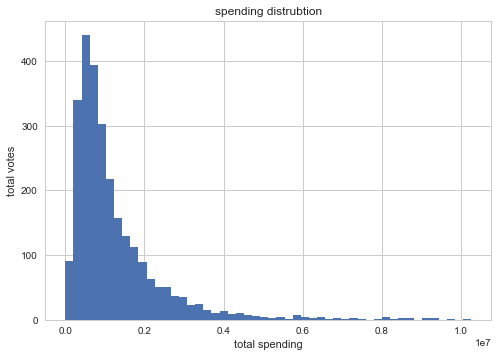

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(Winner['totalspend'], bins = 50, range = (Winner['total_votes'].min(),Winner['total_votes'].max()))
plt.title('spending distrubtion')
plt.xlabel('total spending')
plt.ylabel('total votes')
plt.show()

In [ ]:
sns.factorplot("winner", col="totalspend", col_wrap=2, 
                   data=Gen, kind="count", size=4, aspect=.8)

In [64]:
Gen.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
5,H0AL02087,2012,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,180591.0,0.0,1,180591.0,694953.98,3.848220
6,H0AL02087,2014,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,113103.0,0.0,1,113103.0,570473.48,5.043840
9,H0AL03184,2010,14.95,1441.91,0.00,5000.00,0.0,2293.50,0.00,0.0,...,0,D,0.0,0.0,80204.0,0.0,0,80204.0,8750.36,0.109101
14,H0AL05163,2010,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,...,0,R,35746.0,0.0,131109.0,0.0,1,166855.0,780579.65,4.678192


In [63]:
g = sns.pairplot(data=Gen[['c1', 'c2', 'c3']], hue='winner', dropna=True)

KeyError: 'winner'